In [1]:
import pandas as pd
file_path = 'admission_predict.csv'
admission_df = pd.read_csv(file_path)
admission_df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


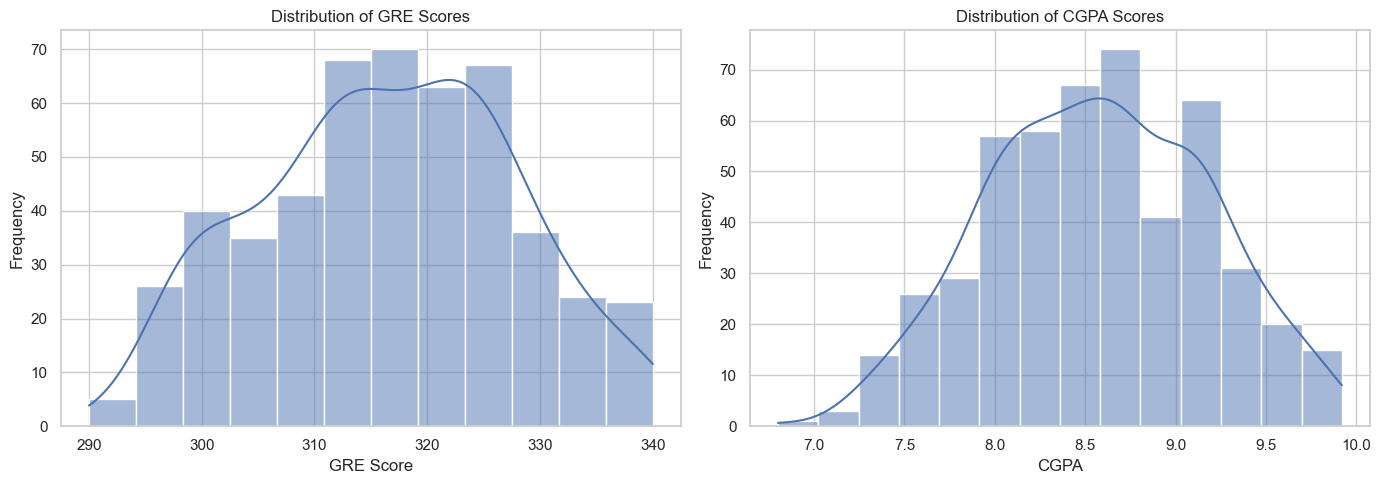

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(admission_df['GRE Score'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of GRE Scores')
axes[0].set_xlabel('GRE Score')
axes[0].set_ylabel('Frequency')
sns.histplot(admission_df['CGPA'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of CGPA Scores')
axes[1].set_xlabel('CGPA')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


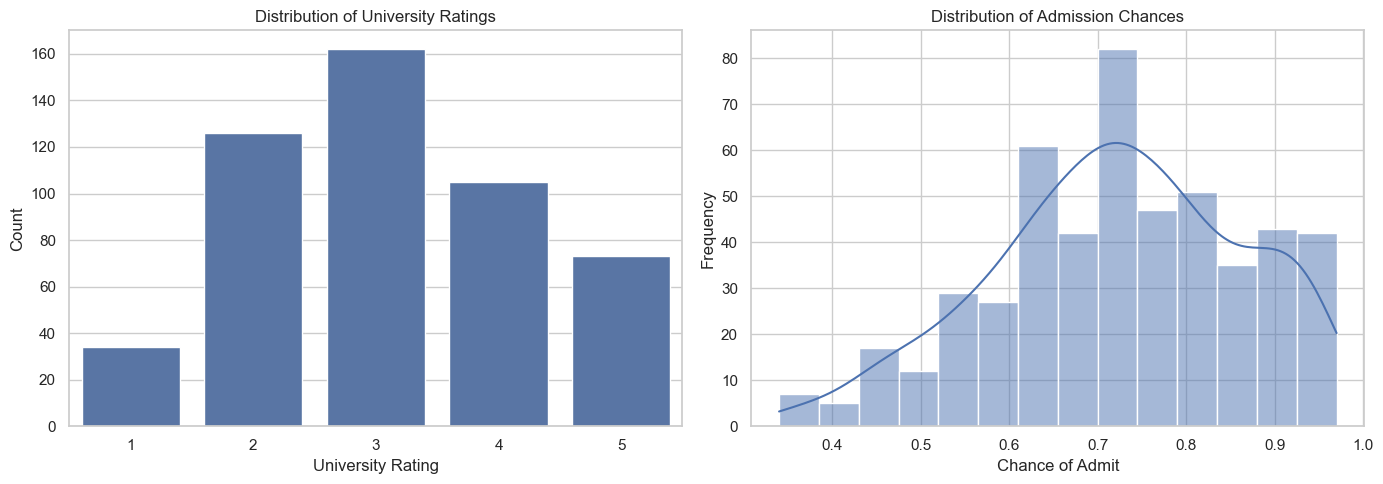

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=admission_df, x='University Rating', ax=axes[0])
axes[0].set_title('Distribution of University Ratings')
axes[0].set_xlabel('University Rating')
axes[0].set_ylabel('Count')
sns.histplot(admission_df['Chance of Admit '], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Admission Chances')
axes[1].set_xlabel('Chance of Admit')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [4]:
missing_values = admission_df.isnull().sum()
summary_statistics = admission_df.describe()
missing_values, summary_statistics


(Serial No.           0
 GRE Score            0
 TOEFL Score          0
 University Rating    0
 SOP                  0
 LOR                  0
 CGPA                 0
 Research             0
 Chance of Admit      0
 dtype: int64,
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
 count  500.000000  500.000000   500.000000         500.000000  500.000000   
 mean   250.500000  316.472000   107.192000           3.114000    3.374000   
 std    144.481833   11.295148     6.081868           1.143512    0.991004   
 min      1.000000  290.000000    92.000000           1.000000    1.000000   
 25%    125.750000  308.000000   103.000000           2.000000    2.500000   
 50%    250.500000  317.000000   107.000000           3.000000    3.500000   
 75%    375.250000  325.000000   112.000000           4.000000    4.000000   
 max    500.000000  340.000000   120.000000           5.000000    5.000000   
 
             LOR         CGPA    Research  Chance of Admit   
 co

In [5]:
missing_values = admission_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
summary_statistics = admission_df.describe()
print("Summary statistics of the dataset:")
print(summary_statistics)


Missing values in each column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Summary statistics of the dataset:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR     

In [6]:
missing_values = admission_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
summary_statistics = admission_df.describe()
print("Summary statistics of the dataset:")
print(summary_statistics)

Missing values in each column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Summary statistics of the dataset:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR     

In [7]:
admission_df = admission_df.dropna() 
Q1 = admission_df.quantile(0.25)
Q3 = admission_df.quantile(0.75)
IQR = Q3 - Q1
admission_df = admission_df[~((admission_df < (Q1 - 1.5 * IQR)) | (admission_df > (Q3 + 1.5 * IQR))).any(axis=1)]


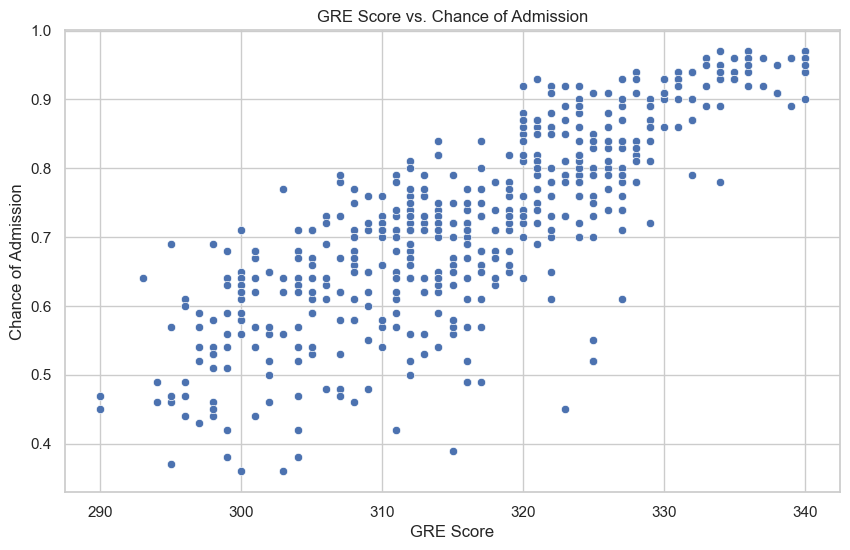

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=admission_df, x='GRE Score', y='Chance of Admit ')
plt.title('GRE Score vs. Chance of Admission')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admission')
plt.show()

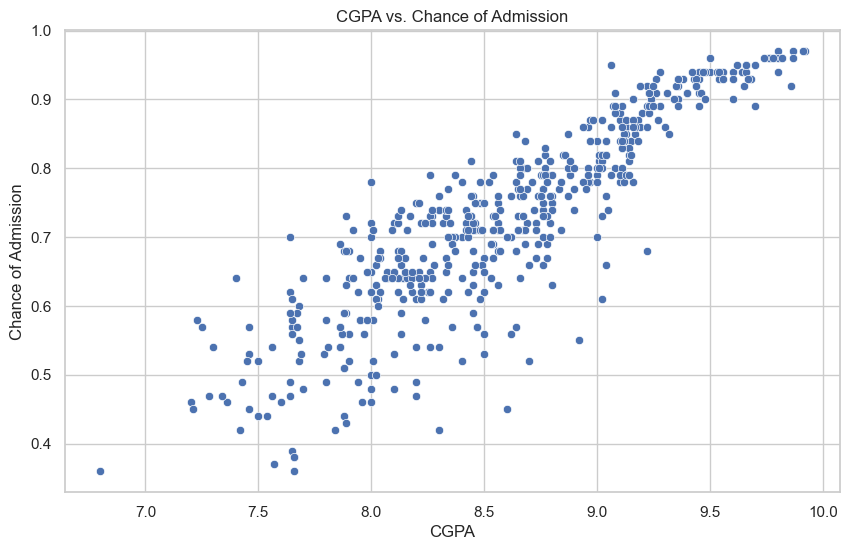

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=admission_df, x='CGPA', y='Chance of Admit ')
plt.title('CGPA vs. Chance of Admission')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.show()


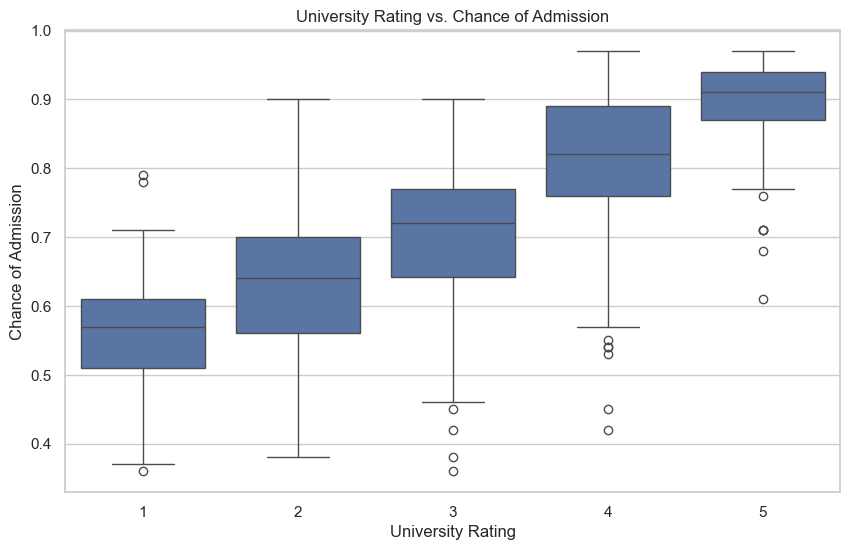

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=admission_df, x='University Rating', y='Chance of Admit ')
plt.title('University Rating vs. Chance of Admission')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

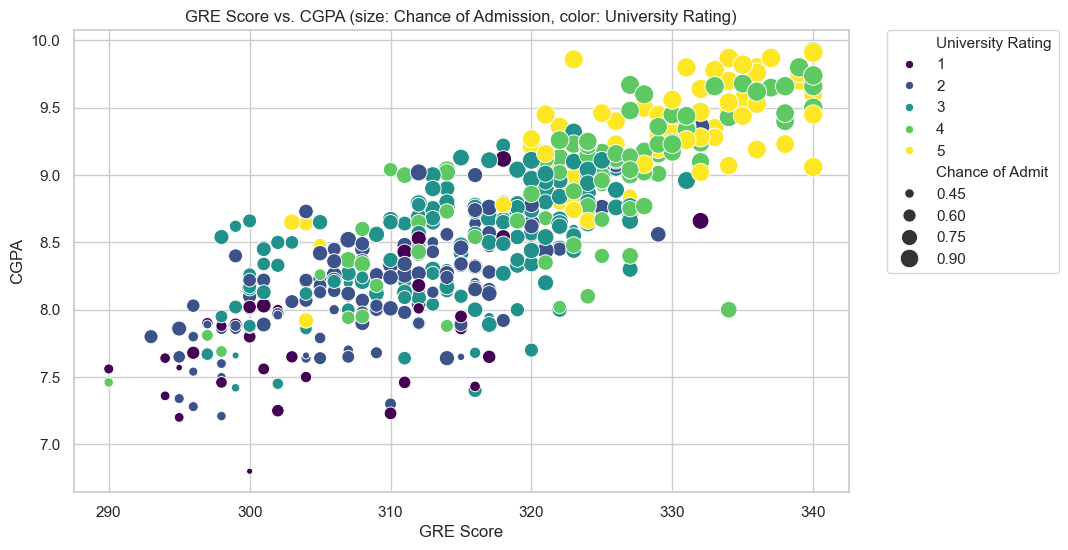

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=admission_df, x='GRE Score', y='CGPA', hue='University Rating', size='Chance of Admit ', palette='viridis', sizes=(20, 200))
plt.title('GRE Score vs. CGPA (size: Chance of Admission, color: University Rating)')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = admission_df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = admission_df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = r2_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn}')


K-Nearest Neighbors Accuracy: 0.6672861337915612


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')


Decision Tree Accuracy: 0.5150594977425759


In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.7727194847604417


In [16]:
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn}')
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Random Forest Accuracy: {accuracy_rf}')


K-Nearest Neighbors Accuracy: 0.6672861337915612
Decision Tree Accuracy: 0.5150594977425759
Random Forest Accuracy: 0.7727194847604417
